In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import math

### Helper Functions

In [3]:
def show(image, title ="", size = 15):
    width, height = image.shape[0], image.shape[1]
    aspect_ratio = width/height
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title(title)
    plt.show()

### 1 -	Open ‘OpenCV’ and ‘I_Love_OpenCV’ images. 

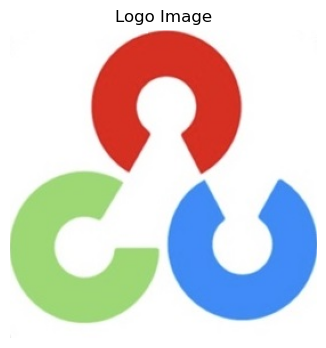

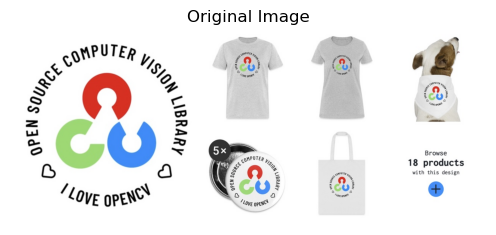

In [31]:
logo = cv.imread('Assignment3_Files/OpenCV.jpg')
img = cv.imread('Assignment3_Files/I_Love_OpenCV.jpg')

assert logo is not None, 'Template not found'
assert img is not None, 'Image not found'

show(logo, 'Logo Image', 4)
show(img, 'Original Image')

### 2 -	Use ORB descriptors to match features. Show the results for the top 15 and the top 20 matches using the matcher below and paste the results here. 
        - a.	BFMatcher
        - b.	FlanBasedMatcher


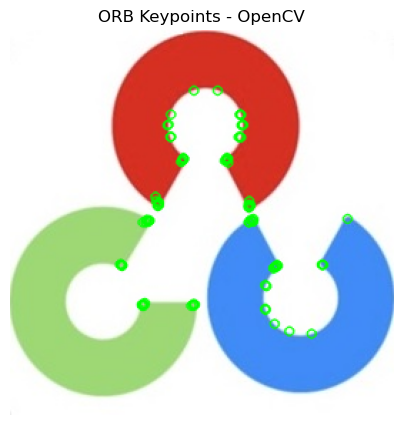

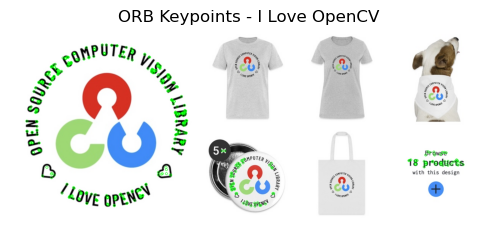

In [41]:
orb = cv.ORB_create()
 
kp1, des1 = orb.detectAndCompute(logo,None)
kp2, des2 = orb.detectAndCompute(img,None)
 
kp_img_1 = cv.drawKeypoints(logo, kp1, None, color=(0,255,0), flags=0)
kp_img_2 = cv.drawKeypoints(img, kp2, None, color=(0,255,0), flags=0)
show(kp_img_1, 'ORB Keypoints - OpenCV', 5)
show(kp_img_2, 'ORB Keypoints - I Love OpenCV')


#### BFMatcher

In [22]:
bf = cv.BFMatcher(cv.NORM_HAMMING, crossCheck=True)

# Match descriptors
matches_bf = bf.match(des1, des2)

# Sort matches based on their distance (best matches first)
matches_bf = sorted(matches_bf, key=lambda x: x.distance)

# Draw top 15 and top 20 matches for BFMatcher
img_bf_15 = cv.drawMatches(logo, kp1, img, kp2, matches_bf[:15], None, flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
img_bf_20 = cv.drawMatches(logo, kp1, img, kp2, matches_bf[:20], None, flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

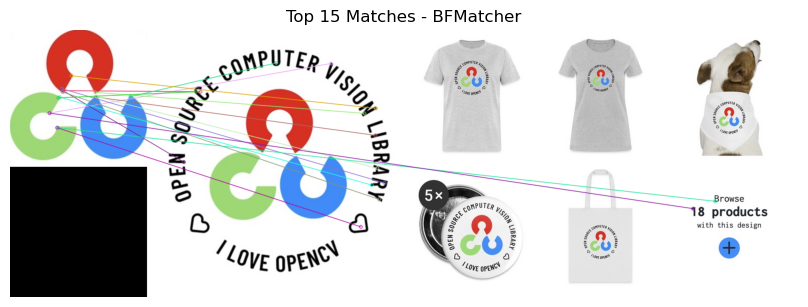

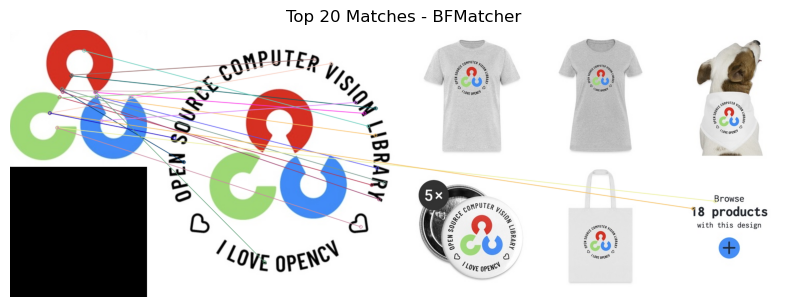

In [30]:
show(img_bf_15, 'Top 15 Matches - BFMatcher', 30)
show(img_bf_20, 'Top 20 Matches - BFMatcher', 30)

#### FlanBasedMatcher

In [42]:
FLANN_INDEX_LSH = 6
index_params = dict(algorithm=FLANN_INDEX_LSH,
                    table_number=12,  # 12 is a good choice for small datasets
                    key_size=20,      # 20 is a good choice for ORB
                    multi_probe_level=2)  # Higher values mean more accuracy

search_params = dict(checks=50)  # Number of checks during search

# Create FLANN-based matcher
flann = cv.FlannBasedMatcher(index_params, search_params)

# Perform KNN matching
matches_flann = flann.knnMatch(des1, des2, k=2)

# Apply ratio test to keep good matches (Lowe's ratio test)
good_matches_flann = []
for m, n in matches_flann:
    if m.distance < 0.75 * n.distance:
        good_matches_flann.append(m)

# Sort the good matches
good_matches_flann = sorted(good_matches_flann, key=lambda x: x.distance)

# Check if we have enough matches
if len(good_matches_flann) == 0:
    raise ValueError("No good matches found with FLANN-based matcher.")

# Draw top 15 and top 20 matches for FlannBasedMatcher
img_flann_15 = cv.drawMatches(logo, kp1, img, kp2, good_matches_flann[:15], None, flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
img_flann_20 = cv.drawMatches(logo, kp1, img, kp2, good_matches_flann[:20], None, flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

show(img_flann_15, 'Top 15 Matches - FlannBasedMatcher', 30)
show(img_flann_20, 'Top 20 Matches - FlannBasedMatcher', 30)


ValueError: No good matches found with FLANN-based matcher.

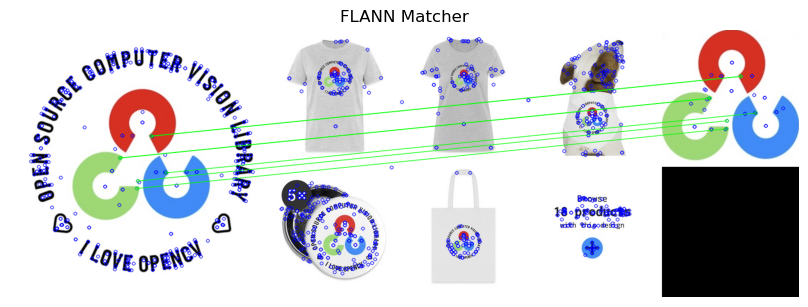

In [38]:
## https://www.geeksforgeeks.org/python-opencv-flannbasedmatcher-function/
def Flanned_Matcher(main_image,sub_image):
   
    # Initiating the SIFT detector
    sift = cv.SIFT_create()
 
    #Find the keypoints and descriptors with SIFT.
    key_point1, descr1 = sift.detectAndCompute(main_image,None)
    key_point2, descr2 = sift.detectAndCompute(sub_image,None)
 
    # FLANN parameters.
    FLANN_INDEX_KDTREE = 0
    index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
    search_params = dict(checks=50) 
 
    # FLANN based matcher with implementation of k nearest neighbour.
    flann = cv.FlannBasedMatcher(index_params,search_params)
    matches = flann.knnMatch(descr1,descr2,k=2)
 
    # selecting only good matches.
    matchesMask = [[0,0] for i in range(len(matches))]
 
    # ratio test.
    for i,(m,n) in enumerate(matches):
        if( m.distance < 0.1*n.distance):
            matchesMask[i]=[1,0]
    draw_params = dict(matchColor = (0,255,0),
                       singlePointColor = (255,0,0),
                       matchesMask = matchesMask,flags = 0)
     
    # drawing nearest neighbours
    img = cv.drawMatchesKnn(main_image,
                            key_point1,
                            sub_image,
                            key_point2,
                            matches,
                            None,
                            **draw_params)
    return img
 
 
#Passing two input images
output=Flanned_Matcher(img,logo)
 
show(output, 'FLANN Matcher', 30)